<a href="https://colab.research.google.com/github/hbabalia/co2emissions/blob/main/Helene_Babalis_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this lab we are using greenhouse gas emissions from Our World in Data to understand the trends of the top ten emitters to see how they have changed over the last 50 years. CO2 levels from all the countries in the world are taken accounted of, and compared to the top ten emitters.

## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

I collected my data for this lab through github under the stated file above. Below is the link of the raw data that it used throughout this lab.

##### Solution

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')


In [ ]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


^ The data above was imported on March 29 2023

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [ ]:
df['country']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
46518       Zimbabwe
46519       Zimbabwe
46520       Zimbabwe
46521       Zimbabwe
46522       Zimbabwe
Name: country, Length: 46523, dtype: object

In [ ]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

The NaN vaules show the rows being removed due to corresponding to the non-countries.

In [ ]:
df_countries = df.loc[df['country'].isin(non_countries)== False]

In [ ]:
df_countries

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


## Explore the data set

##### $\rightarrow$ Display the head of the data frame

The head code collects the 5 first countires on our list of countries. 

##### Solution

In [ ]:
df_countries.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

Most of our meausrements are continuous numbers which should be represented by float. As seen below there a only a few categories that are not represented by a float, which are: country, year, and iso_code. This makes since becuase these vaules are not continuous. 

The colums who have a lower vaule than the Index entries are missing (null) vaules. The current index number is 39638, any values lower are considered missing (null) values.

##### Solution

In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

##### $\rightarrow$ What years are present in the data set?

##### Solution

The years presented in the data set fall between 1971 and 2020.

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

This is a list of the TOP TEN CO2 emitters in the world. The df_countries make sure the top ten countries are being pulled from the whole data set and sorting them by CO2 amount levels.

In [ ]:
df_countries[df_countries['year']== 2020].sort_values(by= 'co2', ascending= False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


In the code below I am creating one single label/code to refrence the list of top ten countries. This code is new so I can just refrence the top ten emitters.

In [ ]:
top_ten_emitters = df_countries.loc[df_countries['country'].isin(df_countries[df_countries['year']== 2020].sort_values(by= 'co2', ascending= False).head(10)['country'])]

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

The graph below is not a normal histogram, it is on a density scale -  representing the total concentration of CO2.

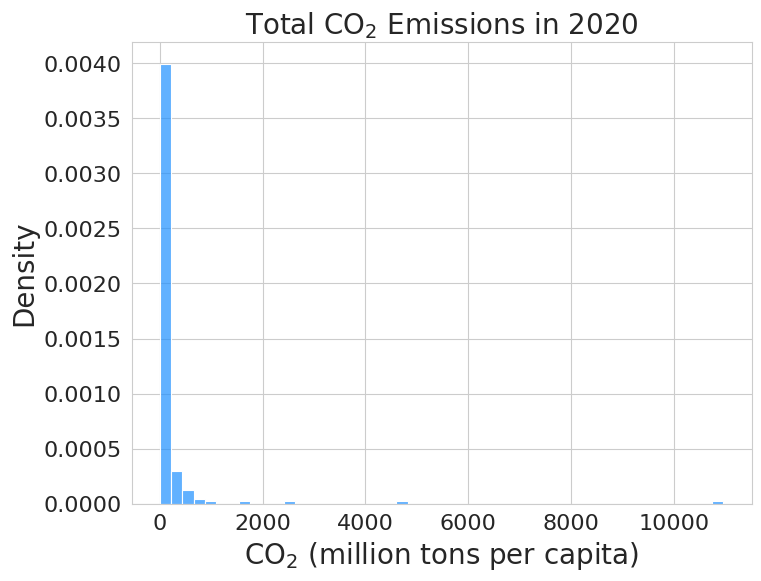

In [ ]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df_countries[df_countries['year'] == 2020], x = 'co2', bins = 50, color = 'dodgerblue', alpha = 0.7, stat= 'density')

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ (million tons per capita)',fontsize = 20)
plt.title('Total CO$_2$ Emissions in 2020', fontsize=20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The histogram on a denisty scale above represents the distribution of data over a continuous interval or time period. The concentration of CO2 shown on this graph is pulled from all countries. I made my bin sizes smaller so it the densitys where more apparent. 

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

Below is a box plot of total CO2 emissions in 2020 with a strip plot on top. The box plot houses the 5 number summary, while the strip plot visualise the distribution of data.

##### Solution

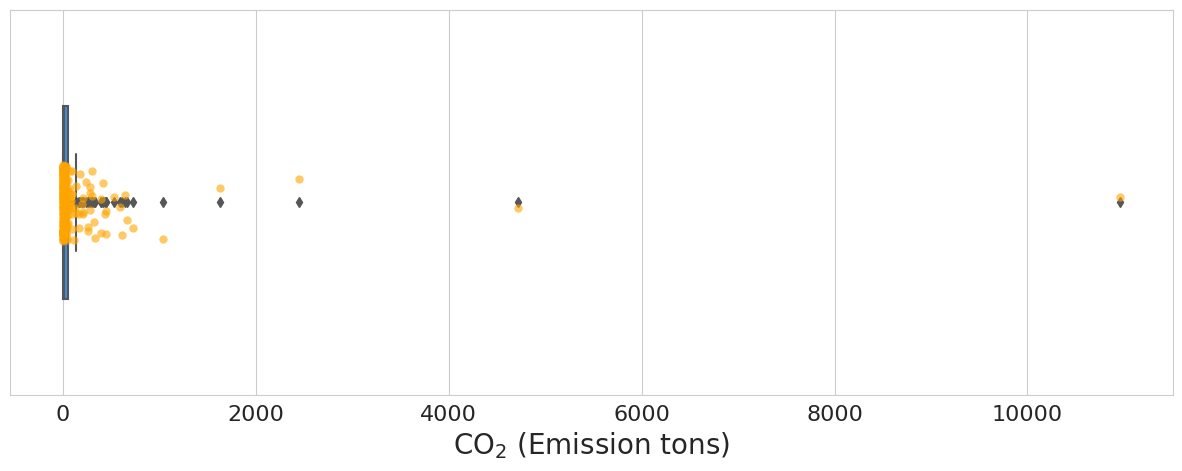

In [ ]:
# Figure size
plt.figure(figsize = (15,5))

# Use Seaborn to make the boxplot, but don't show outliers (fliersize = 0)
sns.boxplot(data = df_countries[df_countries['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5)

# Use Seaborn to make the swarm plot
sns.stripplot(data = df_countries[df_countries['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

# Label axes
plt.xlabel('CO$_2$ (Emission tons)', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);











#### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

Yes, just looking at the graph and making an infrence there are outliers in the top 10 emitter in the 2020 distribution. Specifically, outliers are defined as points that lay outside 1.5 times the inter quartile rang past the third quartile. On the box plot any points past the max line of the box plot is an outlier.
 

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

##### Solution

The false entires on this table are representing the missing CO2 data, while the true entires on this table representing the CO2 data that is not missing.

In [ ]:
top_ten_emitters.isna()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
44221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20136,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
35053,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
21756,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20552,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
36664,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
16794,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20308,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
39259,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


The code below takes the table above and sum all of the vaules, therefore we now know how many missing (null) values there are.

The code below creates an organizated table summing all the missing null values.

In [ ]:
top_ten_emitters.isna().sum()

country                      0
year                         0
iso_code                     0
population                   0
gdp                         10
                            ..
share_global_other_co2       4
total_ghg                   10
total_ghg_excluding_lucf    10
trade_co2                    0
trade_co2_share              0
Length: 74, dtype: int64

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

This time plot of total CO2 emissions from 1971 to 2020 shows the top ten CO2 emitters from 1971 to 2020. The range of the CO2 emissions goes from 0 to 1200, altough none of the top ten countries are near the max range.  

##### Solution

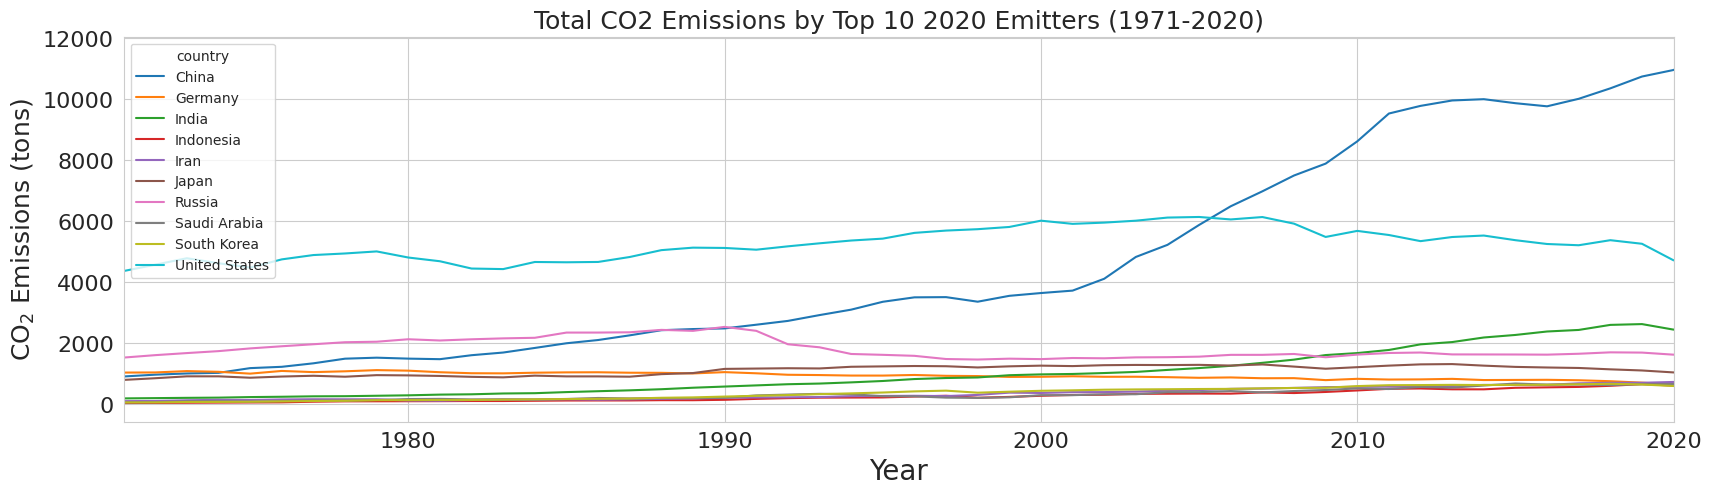

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=top_ten_emitters, 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1971-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);

A time plot is a graph that shows information gathered over time from any process. The chart may be used to see how the data is changing over time and if there is any pattern or randomness to the data points. In our case we can see that the there is a pattern of CO2 emission levels rising over time; China has the greatest increase of CO2 emission levels over times, while Russia had a decrease in CO2 emssions. Over all the countires represented are the specific trends of the top ten emitters of CO2 from 1971 to 2020.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

Using the same code from above, we can again plot a time plot of total CO2 emissions from 1971 to 2020, this time with a mean line. The mean line sums all the countires emissions data from 1971 to 2020 and takes the averge. 

<ipython-input-63-6665a8b85530>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data= df_countries.groupby('year').mean(),x='year', y='co2', color= 'k')


<Axes: title={'center': 'Total CO2 Emissions by Top 10 2020 Emitters (1971-2020)'}, xlabel='Year', ylabel='CO$_2$ Emissions (tons)'>

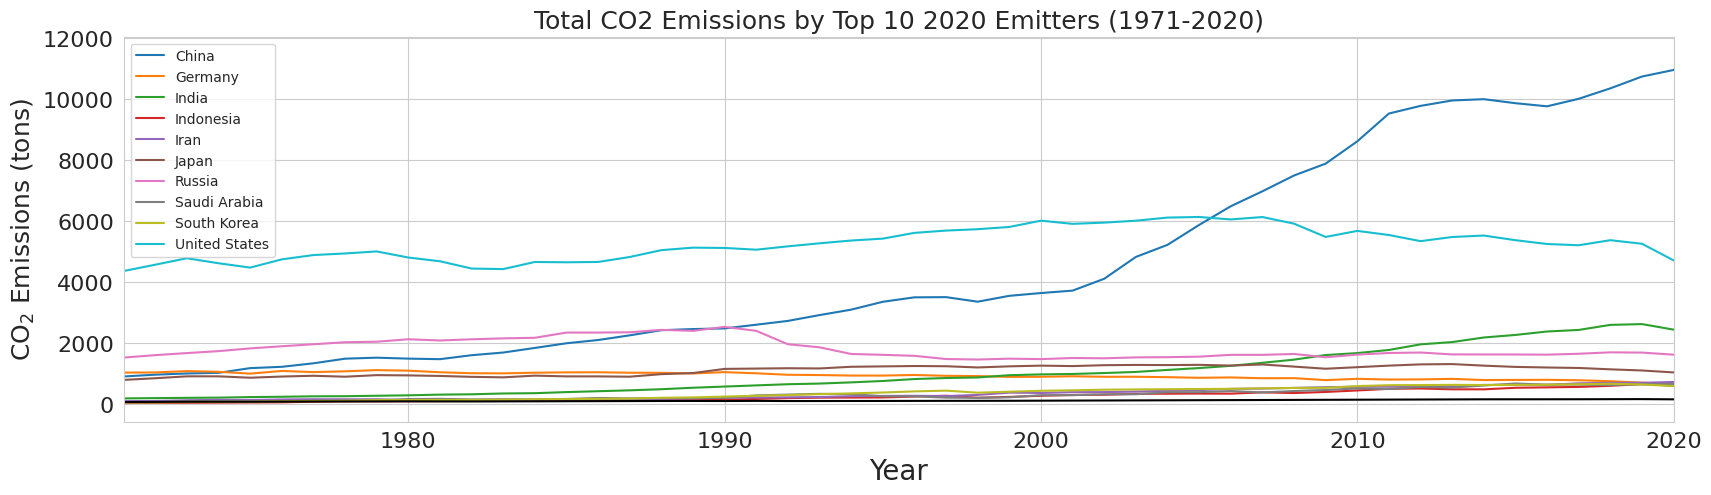

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=top_ten_emitters, 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1971-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);
#Code below sums all the top ten countires CO2 emissions from 1971 to 2020 to produce a mean line 
sns.lineplot(data= df_countries.groupby('year').mean(),x='year', y='co2', color= 'k')

This time plot also shows the overall trend of top ten emitters of CO2 from 1971 to 2020, but now with the mean line representing all countries. The black line at the botton of the graph is the mean line that starts at zero and ends above the zero line, therefore the mean is slowly increasing from 1971 to 2020.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

Below is the top ten emitters and the mean line based off of all countires graph on an log scale. I took the previous code and pasted it only adding a specified line of code to make it on a log scale. 

<ipython-input-64-606e3b3a4315>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data= df_countries.groupby('year').mean(),x='year', y='co2', color= 'k')


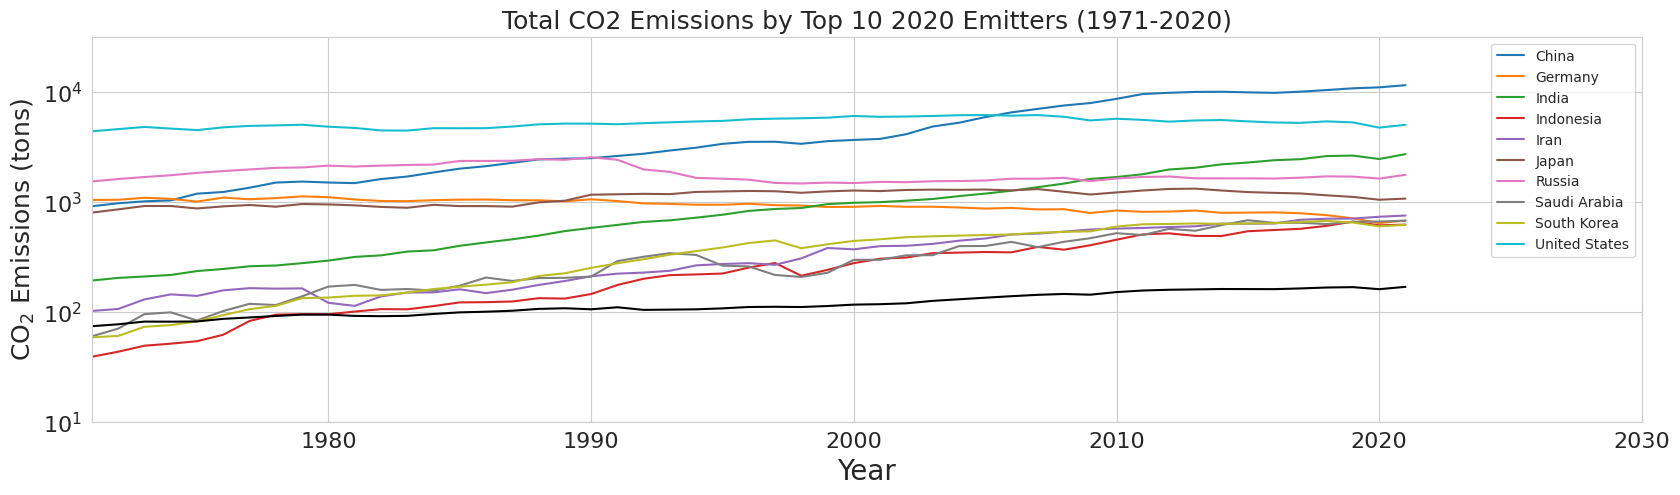

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=top_ten_emitters, 
             x='year', 
             y='co2', 
             hue='country')
#Code below sums all the top ten countires CO2 emissions from 1971 to 2020 to produce a mean line 
sns.lineplot(data= df_countries.groupby('year').mean(),x='year', y='co2', color= 'k')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.ylim(10**1,10**4.5)
plt.xlim(1971,2030)
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1971-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);
#Code below makes the graph on a log scale
plt.yscale('log')

When the data you are showing is much less or greater than the rest of the data or when the percentage changes between values are significant, logarithmic scales are helpful. If the data in the chart span a wide range, you can select whether to use a logarithmic scale. In our case the trend for CO2 emissions in tons from 1971 to 2020 for the top ten countires is increasing. Although, it may seem the increase is not that much, we have to keep in mind that when using a log scale. Therefore the change of CO2 levels from 1971 to 2020 is large. The black line is the mean line representing all countries CO2 emission levels, which also is increasing.

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

Overall the trend in CO2 emissons from these countries over the last 50 years has increased. As you look at the graphs above, the end each line is higher on the CO2 emissions axis than their y - intercept value; meaning the CO2 levels have risen. The mean line is a great piece of data to look at to get an understaning of the total trend. The mean line slowly increases from below 10^2 at 1971 to above 10^2 in 2020 representing all countries. Ultimately, the levels of CO2 emissions of the top ten and other countries are, even though not constantly or consistently increasing, the comprehensive trend is increasing. 